# K-Means Clustering

The Algorithm:-

K-means is one of the simplest unsupervised learning algorithms that solve the well known clustering problem. The procedure follows a simple and easy way to classify a given data set through a certain number of clusters (assume k clusters) fixed a priori. The main idea is to define k centroids, one for each cluster. These centroids shoud be placed in a cunning way because of different location causes different result. So, the better choice is to place them as much as possible far away from each other. The next step is to take each point belonging to a given data set and associate it to the nearest centroid. When no point is pending, the first step is completed and an early groupage is done. At this point we need to re-calculate k new centroids as barycenters of the clusters resulting from the previous step. After we have these k new centroids, a new binding has to be done between the same data set points and the nearest new centroid. A loop has been generated. As a result of this loop we may notice that the k centroids change their location step by step until no more changes are done. In other words centroids do not move any more

The algorithm is composed of the following steps:

1.Place K points into the space represented by the objects that are being clustered. These points represent initial group centroids.

2.Assign each object to the group that has the closest centroid.

3.When all objects have been assigned, recalculate the positions of the K centroids.

4.Repeat Steps 2 and 3 until the centroids no longer move. This produces a separation of the objects into groups from which the metric to be minimized can be calculated.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Uncleaned_Data = pd.read_csv('data.xls')
Uncleaned_Data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# # Cleaned_Data = Uncleaned_Data.replace(to_replace='nan',value=np.nan)
# Cleaned_Data = Uncleaned_Data.dropna(axis=1)
# Cleaned_Data.drop(columns=['diagnosis','id'],inplace=True)

In [4]:
Cleaned_Data = Uncleaned_Data.iloc[: , 2:4]

In [5]:
Cleaned_Data.head(6)

,radius_mean,texture_mean
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
5,12.45,15.70


In [6]:
Cleaned_Data.isnull().sum()

radius_mean     0
texture_mean    0
dtype: int64

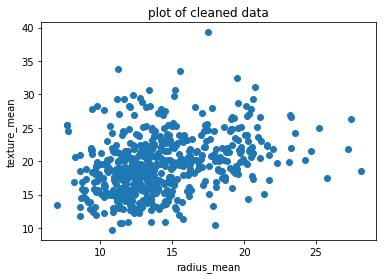

In [7]:
plt.scatter(Cleaned_Data.iloc[:,0],Cleaned_Data.iloc[:,1])
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.title('plot of cleaned data')
plt.show()

In [8]:
Cleaned_Data_Arr = np.array(Cleaned_Data)

In [9]:
#--taking random point(i.e consider as centroid of two cluster) from Cleaned Data---

Old_Point_Cluster_1 = np.array(Cleaned_Data.iloc[np.random.randint(0,Cleaned_Data.shape[0]) , :]).reshape(1,Cleaned_Data.shape[1])[0]
Old_Point_Cluster_2 = np.array(Cleaned_Data.iloc[np.random.randint(0,Cleaned_Data.shape[0]) , :]).reshape(1,Cleaned_Data.shape[1])[0]

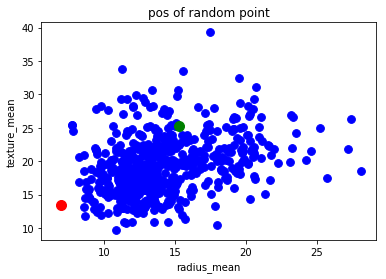

In [10]:
#--Scatter plot of random point(i.e consider as centroid of two cluster) from Cleaned Data and Cleaned Data----

plt.scatter(Cleaned_Data.iloc[:,0],Cleaned_Data.iloc[:,1],c='b',s=60)
plt.scatter(Old_Point_Cluster_1[0],Old_Point_Cluster_1[1],c='g',s=100)
plt.scatter(Old_Point_Cluster_2[0],Old_Point_Cluster_2[1],c='r',s=100)
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.title("pos of random point")
plt.show()

In [11]:
#--point which is used as condition point..if differnence between each respective point less than epsilon less come out from loop----

epsilon = [0.2]*Cleaned_Data.shape[1]
epsilon = np.array(epsilon).reshape(1,-1)
epsilon.shape

(1, 2)

In [12]:
i=0

while(True):
    
    Euclidean_Dist_1 = np.sqrt(np.sum(np.square(np.subtract(Cleaned_Data_Arr,Old_Point_Cluster_1)),axis=1))
    Euclidean_Dist_2 = np.sqrt(np.sum(np.square(np.subtract(Cleaned_Data_Arr,Old_Point_Cluster_2)),axis=1))
    
    print('Distance:',Euclidean_Dist_1[0] , Euclidean_Dist_2[0],'\n') #--printing one value of Euclidean distance array
    
    Clus_Ind_1 = np.where(Euclidean_Dist_1 < Euclidean_Dist_2)   #__finding index of element which satifies the conditon
    Clus_Ind_2 = np.where(Euclidean_Dist_2 < Euclidean_Dist_1)
    
    Cluster_1 = Cleaned_Data_Arr[Clus_Ind_1[0],:]   #__Cluster of data which bring out from original data by using index
    Cluster_2 = Cleaned_Data_Arr[Clus_Ind_2[0],:]
    
    
    print('Old Point:',Old_Point_Cluster_1[0] , Old_Point_Cluster_2[0],'\n') #--printing one value of points of Old Points array
    
    New_Point_Cluster_1 = np.mean(Cluster_1,axis=0).reshape(1,Cleaned_Data.shape[1])[0]
    New_Point_Cluster_2 = np.mean(Cluster_2,axis=0).reshape(1,Cleaned_Data.shape[1])[0]
    
    print('New Point:',New_Point_Cluster_1[0] , New_Point_Cluster_2[0],'\n')  #--printing one value of points of New Points array

    
   #----checking that Whether changing of all elements in new centroid point is stop or not-------

    if np.alltrue(np.abs(Old_Point_Cluster_1 - New_Point_Cluster_1) < epsilon) and np.alltrue(np.abs(Old_Point_Cluster_2 - New_Point_Cluster_2) < epsilon) or i>10:
        break
        
    Old_Point_Cluster_1 = New_Point_Cluster_1
    Old_Point_Cluster_2 = New_Point_Cluster_2
    
    i+=1

Distance: 15.131034333448588 11.423685088446721 

Old Point: 15.3 6.981 

New Point: 15.699687116564432 12.017823045267491 

Distance: 11.79474932721585 8.01158999230676 

Old Point: 15.699687116564432 12.017823045267491 

New Point: 16.093559139784954 12.235606896551731 

Distance: 12.320238539356318 8.148764244105767 

Old Point: 16.093559139784954 12.235606896551731 

New Point: 16.314372093023255 12.312929260450169 

Distance: 12.537977327079489 8.254979113304413 

Old Point: 16.314372093023255 12.312929260450169 

New Point: 16.44665853658536 12.360839009287934 



In [13]:
print('Predicted Shape of Two Cluster')
print(Cluster_1.shape)
print(Cluster_2.shape)

Predicted Shape of Two Cluster
(246, 2)
(323, 2)


In [14]:
Malignant_Cluster = Uncleaned_Data[Uncleaned_Data['diagnosis']=='M']
Malignant_Cluster = Malignant_Cluster.iloc[:,2:4]

Benign_Cluster = Uncleaned_Data[Uncleaned_Data['diagnosis']=='B']
Benign_Cluster = Benign_Cluster.iloc[:,2:4]

In [15]:
print('Actual Shape of Two Cluster:')
print(Malignant_Cluster.shape)
print(Benign_Cluster.shape)

Actual Shape of Two Cluster:
(212, 2)
(357, 2)


In [16]:
Malignant_Cluster.describe()

,radius_mean,texture_mean
count,212.000000,212.000000
mean,17.462830,21.604906
std,3.203971,3.779470
min,10.950000,10.380000
25%,15.075000,19.327500
50%,17.325000,21.460000
75%,19.590000,23.765000
max,28.110000,39.280000


In [17]:
Benign_Cluster.describe()

,radius_mean,texture_mean
count,357.000000,357.000000
mean,12.146524,17.914762
std,1.780512,3.995125
min,6.981000,9.710000
25%,11.080000,15.150000
50%,12.200000,17.390000
75%,13.370000,19.760000
max,17.850000,33.810000


Text(0,0.5,'texture_mean')

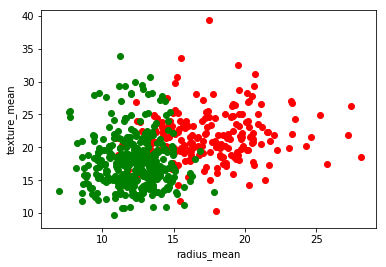

In [18]:
plt.scatter(Malignant_Cluster.iloc[:,0],Malignant_Cluster.iloc[:,1],c='r')
plt.scatter(Benign_Cluster.iloc[:,0],Benign_Cluster.iloc[:,1],c='g')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')

Text(0,0.5,'texture_mean')

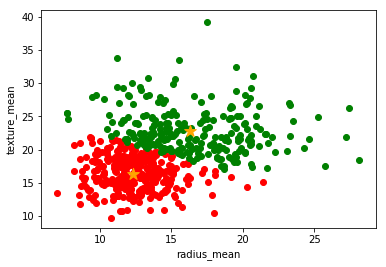

In [19]:
#--ploting the cluster which is come after k-mean clustering algorithm--

plt.scatter(Cluster_2[:,0],Cluster_2[:,1],c='r')
plt.scatter(Cluster_1[:,0],Cluster_1[:,1],c='g')

plt.scatter(Old_Point_Cluster_1[0],Old_Point_Cluster_1[1],c='orange',marker='*',s=150)
plt.scatter(Old_Point_Cluster_2[0],Old_Point_Cluster_2[1],c='orange',marker='*',s=150)
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')

#  By Using Library

In [20]:
from sklearn.cluster import KMeans

In [21]:
clf = KMeans(n_clusters=2)
clf.fit(Cleaned_Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
centroid = clf.cluster_centers_
centroid

array([[12.42323824, 16.69111765],
       [16.65732751, 23.14772926]])

In [23]:
labels = clf.labels_
labels

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [24]:
Cluster_1 = Cleaned_Data.iloc[np.where(labels==1)[0] , :]
Cluster_2 = Cleaned_Data.iloc[np.where(labels==0)[0] , :]
print(Cluster_1.shape)
print(Cluster_2.shape)

(229, 2)
(340, 2)


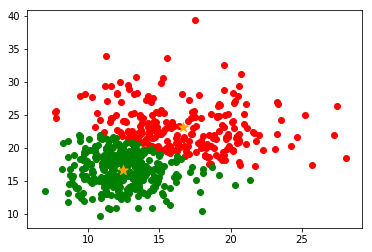

In [25]:
plt.scatter(Cluster_1.iloc[:,0],Cluster_1.iloc[:,1],c='r')
plt.scatter(Cluster_2.iloc[:,0],Cluster_2.iloc[:,1],c='g')
plt.scatter(centroid[0][0],centroid[0][1],c='orange',s=100,marker='*')
plt.scatter(centroid[1][0],centroid[1][1],c='orange',s=100,marker='*')